In [31]:
# Library of Functions

def linePlaneIntersection(lineDir, linePt, planeDir, planePt):
    lineDir = vector(lineDir)
    linePt = vector(linePt)
    planeDir = vector(planeDir)
    planePt = vector(planePt)

    return linePt + ((planePt - linePt).dot_product(planeDir)/lineDir.dot_product(planeDir))*lineDir

def rotMat3D(u, theta):
    u = vector(u)
    a, b, c = u/norm(u)
    
    row1 = [a^2*(1 - cos(theta)) + cos(theta), a*b*(1 - cos(theta)) - c*sin(theta), a*c*(1 - cos(theta)) + b*sin(theta)]
    row2 = [a*b*(1 - cos(theta)) + c*sin(theta), b^2*(1 - cos(theta)) + cos(theta), b*c*(1 - cos(theta)) - a*sin(theta)]
    row3 = [a*c*(1 - cos(theta)) - b*sin(theta), b*c*(1 - cos(theta)) + a*sin(theta), c^2*(1 - cos(theta)) + cos(theta)]
    
    return matrix([row1, row2, row3])

In [21]:
# OBJ File Processing
import numpy as np

def file_processing(in_file):
    global vertices
    global faces
    vertices = []
    faces = []
    f = open(in_file)
    buf = f.read()
    newbuf = buf.split('\n')
    for i in range (0, len(newbuf)):
        if newbuf[i][:1]== 'v':
            vertices.append(newbuf[i].split(' ')[1:])
    for i in range (0, len(newbuf)):
        if newbuf[i][:1]== 'f':
            faces.append(newbuf[i].split(' ')[1:])
    faces = [[int(x)-1 for x in row] for row in faces] #-1 to take into account zero indexing
    vertices = [[float(x) for x in row] for row in vertices]
    vertices = [tuple(row) for row in vertices]
    f.close()
file_processing('shuttle.obj')

In [28]:
# 3D Object View

plane = sum([polygon([vertices[i]for i in shape], color = 'yellow', edgecolor = 'black', thickness = 4) for shape in faces]) #takes the sum of all the polygons given by vertices mapped using faces 
plane.show()

    


Graphics3d Object

Animation with 40 frames
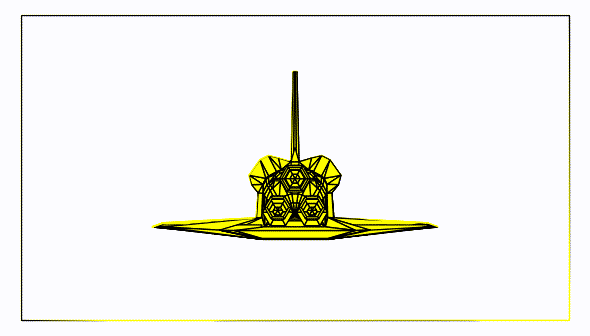

In [55]:
# Perspective Projection

#add a rectangle for the frame
# z axis is given by 0,0,1
#theta goes from 0 to 4*pi
frames = [polygon([(9,-4), (9,6), (-9,6), (-9,-4)], color = 'white', edgecolor = 'black')+ sum([polygon([list(linePlaneIntersection((18,0,0),rotMat3D((0,0,1), theta)*vector(vertices[i]),(1,0,0),(15,0,0))[1:]) for i in shape], color = 'yellow', edgecolor= 'black') for shape in faces]) for theta in sxrange(0, 4*pi, pi/10)]
plane_angles = animate(frames, aspect_ratio = 1, fig_tight = true, frame = false, axes = false) #remove frame and axes, so frame is just a box
plane_angles.show()
plane_angles.save('shuttle.gif',iterations = 0)